In [ ]:
#EDA 3 Looks at the profile of sales
#will look at the top elements and see if have similar pattern

#randomly selected bunch of mid & low and see if same or different behaviours


In [141]:
#read in the file, group the sales, add the Year Month variable and then pivot the data 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import pixiedust as pix
dateCols = ['date']
train2=pd.read_csv("/home/cdsw/train_plus_not_imputted.csv",parse_dates=dateCols)
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2['YM'] = train2['Year']*100+train2["Month"]
sales_per_item_PM= train2.groupby(['item_id','YM'])['item_cnt_day'].sum().reset_index()
sales_perM= sales_per_item_PM.pivot_table(index=["item_id"],columns="YM",values="item_cnt_day", fill_value=0).reset_index() 
sales_perM.head()

YM,item_id,201301,201302,201303,201304,201305,201306,201307,201308,201309,...,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#create the filters for high or low
sales_per_item=train2.groupby(["item_id"])["item_cnt_day"].sum().reset_index()
sales_per_item["permonth"]=sales_per_item.item_cnt_day/36
sales_per_item["perweek"]=sales_per_item.item_cnt_day/150
len(sales_per_item[sales_per_item.perweek >20])


107

In [108]:
#create a sorted list of the frequency of sales
ordered_sales=sales_per_item.sort_values(by='item_cnt_day', ascending=False)
ordered_sales["id"]="it_" + ordered_sales.item_id.astype(str)
ordered_sales.head(20)

,item_id,item_cnt_day,permonth,perweek,id
20602,20949,187642.0,5212.277778,1250.946667,it_20949
2749,2808,17245.0,479.027778,114.966667,it_2808
3654,3732,16642.0,462.277778,110.946667,it_3732
17418,17717,15830.0,439.722222,105.533333,it_17717
5717,5822,14515.0,403.194444,96.766667,it_5822
3656,3734,11688.0,324.666667,77.920000,it_3734
6543,6675,10289.0,285.805556,68.593333,it_6675
3653,3731,10099.0,280.527778,67.326667,it_3731
1814,1855,10032.0,278.666667,66.880000,it_1855
16493,16787,9227.0,256.305556,61.513333,it_16787


In [89]:
ordered_sales.id[0:9]

20602    it_20949
2749      it_2808
3654      it_3732
17418    it_17717
5717      it_5822
3656      it_3734
6543      it_6675
3653      it_3731
1814      it_1855
Name: id, dtype: object

In [35]:
#restrict to those that are high sales
high=sales_perM[sales_perM.item_id.isin(sales_per_item.item_id[sales_per_item.perweek>20])]
high["item_id"]= "it_" + high["item_id"].astype(str)
high.index=high.item_id

high_t=high.drop("item_id",axis=1).transpose()
high_t.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


item_id,it_1495,it_1511,it_1512,it_1516,it_1555,it_1556,it_1830,it_1849,it_1855,it_1905,...,it_16227,it_16787,it_16790,it_17717,it_20608,it_20949,it_21404,it_21440,it_22087,it_22088
YM,,,,,,,,,,,,,,,,,,,,,
201301,64,77,117,41,0,0,488,263,162,139,...,110,123,0,135,0,2129,0,80,163,269
201302,31,26,118,294,0,0,749,262,176,159,...,151,134,0,110,0,2089,0,73,180,264
201303,37,29,86,230,0,0,593,157,237,174,...,149,105,0,226,0,2090,0,833,188,273
201304,26,29,63,182,0,0,343,83,177,140,...,75,137,0,89,0,1998,0,410,160,170
201305,36,24,49,302,0,0,370,88,113,151,...,71,129,0,97,0,4576,0,212,165,201


,item_id,item_cnt_day,permonth,perweek,id
2749,2808,17245.0,479.027778,114.966667,it_2808
3654,3732,16642.0,462.277778,110.946667,it_3732
17418,17717,15830.0,439.722222,105.533333,it_17717
5717,5822,14515.0,403.194444,96.766667,it_5822
3656,3734,11688.0,324.666667,77.920000,it_3734
6543,6675,10289.0,285.805556,68.593333,it_6675
3653,3731,10099.0,280.527778,67.326667,it_3731
1814,1855,10032.0,278.666667,66.880000,it_1855
16493,16787,9227.0,256.305556,61.513333,it_16787


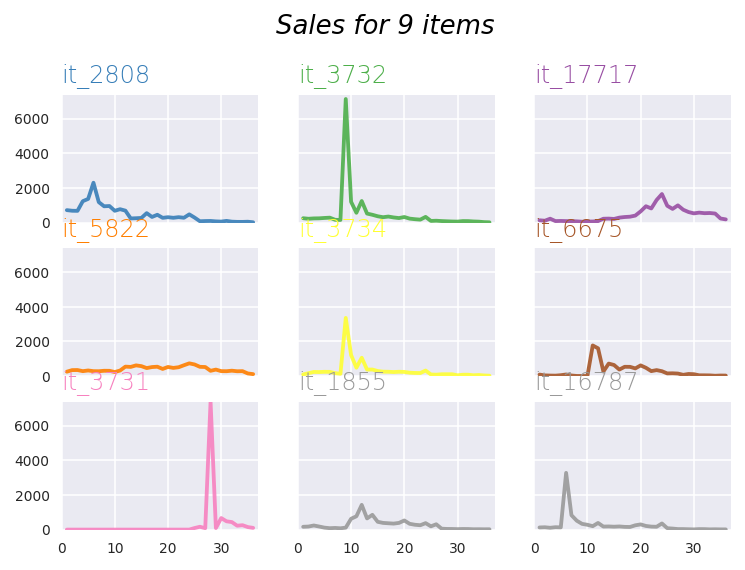

In [113]:

def printcharts(df):
     
    """Take 9 of the products and plot them to show how the sales over time"""

    # Initialize the figure
    plt.style.use('seaborn-darkgrid')

    # create a color palette
    palette = plt.get_cmap('Set1')

    # multiple line plot
    num=0
    for column in df:
        num+=1

        # Find the right spot on the plot
        plt.subplot(3,3, num)

        # Plot the lineplot
        plt.plot(range(1,37), df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

        # Same limits for everybody!
        plt.xlim(0,37)
        plt.ylim(0,df.max().max())

        # Not ticks everywhere
        if num in range(7) :
            plt.tick_params(labelbottom='off')
        if num not in [1,4,7] :
            plt.tick_params(labelleft='off')

        # Add title
        plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

    # general title
    plt.suptitle("Sales for 9 items", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

#I've not forgotten that python is zero indexed - the first variable is just way bigger and I wanted to remove that scaling
printcharts(high_t.loc[:,list(ordered_sales.id[1:10])])
ordered_sales.iloc[1:10,]

In [175]:
#display(high[high.item_id.isin(ordered_sales.id[1:10])])
#compare 1855  6675 5822 17717 2808 
#compare  16787 3734 , poss sep 3732 3731
display(high[high.item_id.isin(["it_1855" ,"it_6675", "it_5822", "it_17717", "it_2808"])])

item_id,201301,201302,201303,201304,201305,201306,201307,201308,201309,201310,201311,201312,201401,201402,201403,201404,201405,201406,201407,201408,201409,201410,201411,201412,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
it_1855,162,176,237,177,113,81,95,75,113,624,768,1426,644,851,450,386,365,346,386,526,334,279,252,373,189,307,55,38,35,26,35,32,19,21,17,19
it_2808,720,685,679,1236,1366,2300,1181,942,957,683,774,691,242,253,270,547,327,453,276,312,279,314,280,477,290,79,91,96,72,60,100,56,43,42,52,20
it_5822,255,346,350,286,325,285,281,308,306,235,321,547,530,619,575,464,522,542,414,528,473,512,627,736,671,535,525,306,376,287,283,312,280,286,153,114
it_6675,88,42,32,27,52,94,36,9,9,6,1768,1603,264,722,641,377,537,534,444,618,479,288,346,283,155,162,147,74,123,110,47,45,41,21,34,31
it_17717,135,110,226,89,97,88,84,73,53,63,65,87,224,232,212,289,323,342,406,649,945,817,1304,1649,971,791,996,744,610,534,576,544,554,524,238,186


,item_id,item_cnt_day,permonth,perweek,id
7698,7856,9012.0,250.333333,60.080000,it_7856
4097,4181,8869.0,246.361111,59.126667,it_4181
3264,3331,8262.0,229.500000,55.080000,it_3331
2388,2445,7788.0,216.333333,51.920000,it_2445
2263,2308,7588.0,210.777778,50.586667,it_2308
4782,4870,7551.0,209.750000,50.340000,it_4870
6600,6738,7351.0,204.194444,49.006667,it_6738
2755,2814,7105.0,197.361111,47.366667,it_2814
1789,1830,6975.0,193.750000,46.500000,it_1830


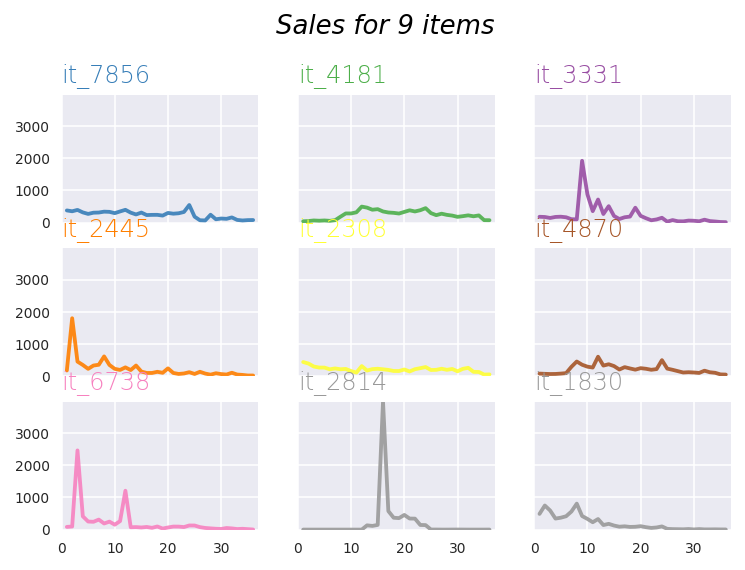

In [115]:
#so even though some items have similar volumes over time, and whilst they all have some form of peak, some have more extreme
#peaks
#do they peeter out until almost nothing?  Is there a relationship to its max and how long that takes?
printcharts(high_t.loc[:,list(ordered_sales.id[10:19])])
ordered_sales.iloc[10:19,]

,item_id,item_cnt_day,permonth,perweek,id
11170,11373,6563.0,182.305556,43.753333,it_11373
6387,6503,6548.0,181.888889,43.653333,it_6503
5718,5823,6523.0,181.194444,43.486667,it_5823
3655,3733,6506.0,180.722222,43.373333,it_3733
6602,6740,6270.0,174.166667,41.800000,it_6740
5716,5821,6244.0,173.444444,41.626667,it_5821
16496,16790,6219.0,172.750000,41.460000,it_16790
11167,11370,6163.0,171.194444,41.086667,it_11370
6381,6497,6141.0,170.583333,40.940000,it_6497


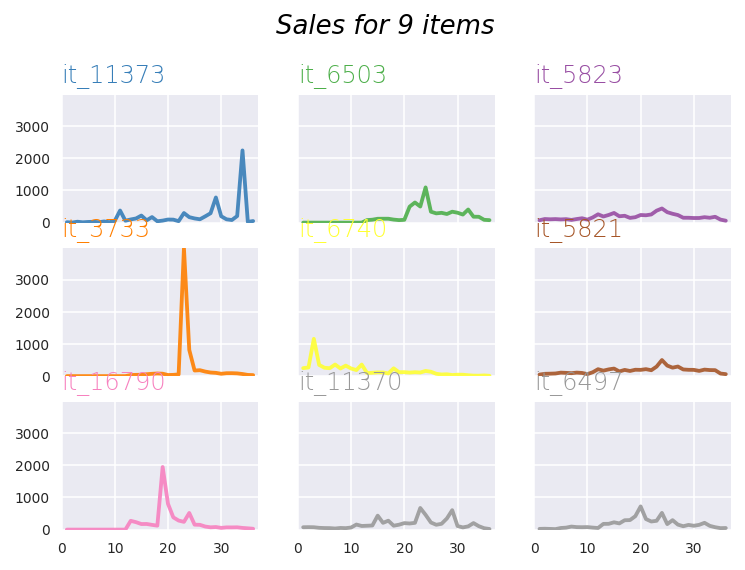

In [116]:
printcharts(high_t.loc[:,list(ordered_sales.id[19:28])])
ordered_sales.iloc[19:28,]

YM
201301     254
201302     223
201303     243
201304     248
201305     269
201306     286
201307     163
201308     154
201309    7126
201310    1202
Name: it_3732, dtype: int64


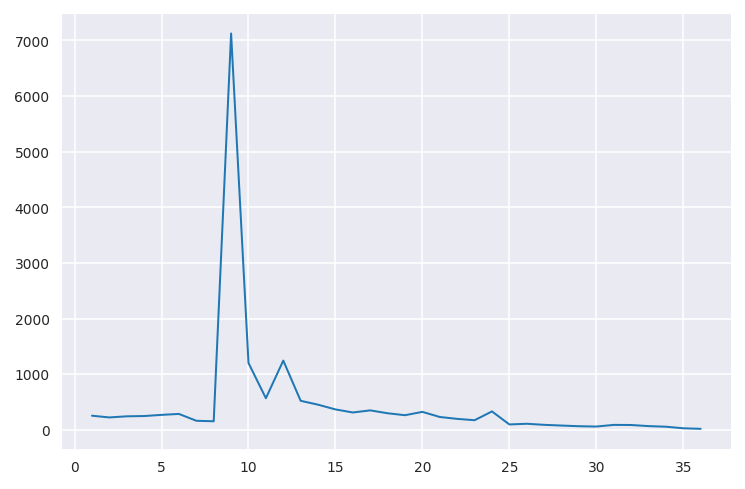

In [121]:
#some of the patterns are really interesting...practically flat yet still account for relatively high volume here
#for example it_3732 has a peak but still had some good sales for 5 months before hand...
plt.plot(range(1,37),high_t.it_3732)
print(high_t.loc[:,"it_3732"].head(10))

YM
201301       0
201302       0
201303       0
201304       0
201305       0
201306       0
201307       0
201308       0
201309       0
201310       0
201311       0
201312       0
201401     273
201402     231
201403     173
201404     175
201405     147
201406     123
201407    1947
201408     803
Name: it_16790, dtype: int64

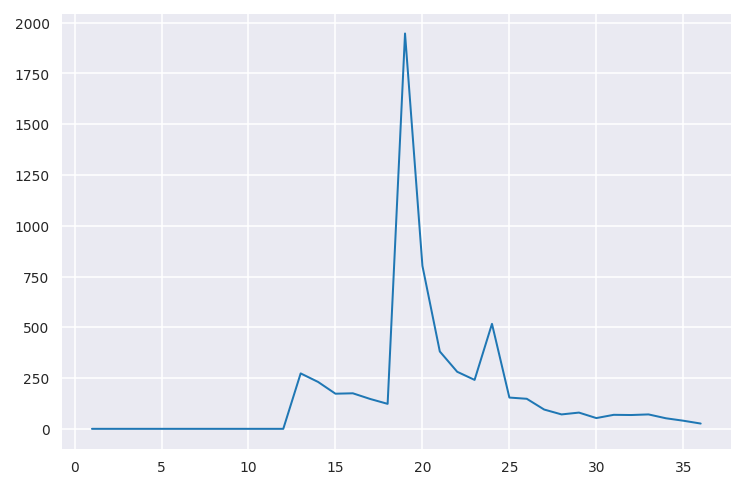

In [124]:
#lets see if we get a similar view for another it_16790 - yep
plt.plot(range(1,37), high_t.it_16790)
high_t.loc[:,"it_16790"].head(20)

In [ ]:
#this suggests there is not just a new product and it suddenly takes off... it buids for some 6 months and then builds and peters out
#there are a number of different patterns - in terms of modelling, could look at
    #when max was
    #how large max was
    #try to assess how it dropped off after and see if that's a predictor - 
    #how many of these have a peak - need to define what a peak is

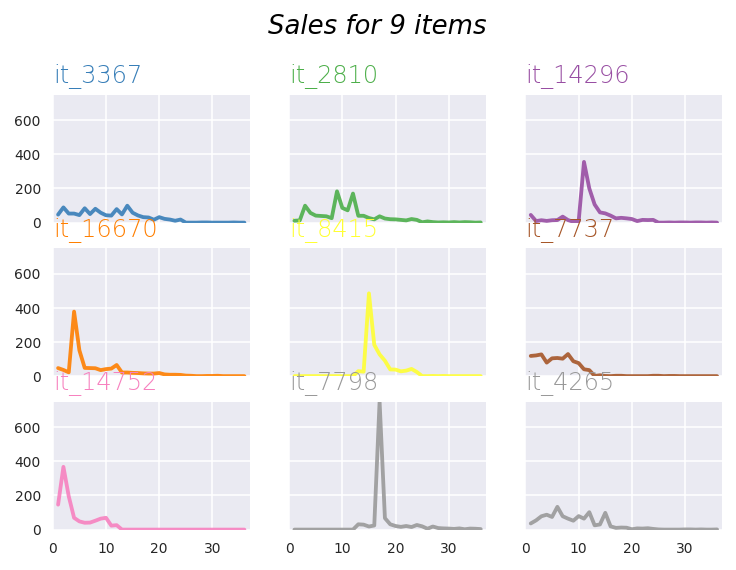

In [146]:
#create transposed file for all so can look at all not just those who are not selling most
sales_perM["id"]= "it_" + sales_perM["item_id"].astype(str)
sales_perM.index=sales_perM.id

sales_perM_t=sales_perM.drop(["item_id","id"],axis=1).transpose()
#printcharts(sales_perM_t.loc[:,list(ordered_sales.id[500:509])])
printcharts(sales_perM_t.loc[:,list(ordered_sales.id[500:509])])
#see similar behaviours in the data as seen before hand...reasonable base, peak and then flatter...

In [185]:
print(train2[(train2.item_id==3732) & (train2.YM==201309)].head())

train2[(train2.item_id==3732) & (train2.YM==201308)].head()
#this shows that there is some change in the price over time
#second also shows that there is some difference in price in different stores...

        Unnamed: 0       date  date_block_num  shop_id  item_id  item_price  \
837545      837545 2013-09-18               8       51     3732      2184.0   
837546      837546 2013-09-20               8       51     3732      2184.0   
837547      837547 2013-09-23               8       51     3732      2184.0   
837548      837548 2013-09-24               8       51     3732      2184.0   
837549      837549 2013-09-25               8       51     3732      2184.0   

        item_cnt_day                                   item_name  \
837545          31.0  Grand Theft Auto V [PS3, русские субтитры]   
837546           4.0  Grand Theft Auto V [PS3, русские субтитры]   
837547           3.0  Grand Theft Auto V [PS3, русские субтитры]   
837548           2.0  Grand Theft Auto V [PS3, русские субтитры]   
837549           1.0  Grand Theft Auto V [PS3, русские субтитры]   

        item_category_id  Month  Year      YM  
837545                19      9  2013  201309  
837546              

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Month,Year,YM
933450,933450,2013-08-10,9,44,3732,2599.0,1.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308
935121,935121,2013-08-10,9,45,3732,2599.0,3.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308
936489,936489,2013-08-10,9,38,3732,2599.0,2.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308
937300,937300,2013-08-10,9,37,3732,2299.0,1.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308
938129,938129,2013-08-10,9,41,3732,2524.0,4.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308


In [187]:
train2[(train2.item_id==3732) & (train2.YM==201308) & (train2.shop_id==37)]

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Month,Year,YM
937300,937300,2013-08-10,9,37,3732,2299.0,1.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308
1233811,1233811,2013-08-12,11,37,3732,2599.0,1.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308


In [188]:
train2[(train2.item_id==3732) & (train2.YM==201308) & (train2.shop_id==41)]

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,Month,Year,YM
938129,938129,2013-08-10,9,41,3732,2524.0,4.0,"Grand Theft Auto V [PS3, русские субтитры]",19,8,2013,201308


In [ ]:
#price changes over time therefore have an impact on the sales here -
#its like there are initial sales and then bulk is purchased when the price drops a little
#need to look at the price variety in a month too